In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import driver
import robo_supply_model

In [109]:
emissions_start = 5_000_000
emissions_end = 500_000
emissions_total_target = 197_000_000
# emissions_total_target = 125_000_000
subnet_maintenance_fee_pct = 0.25

In [110]:
airdrop_vest = 6
community_vest = 12

In [ ]:
ent_arrival_rate = 100.0
num_ents_start_desired = 500
num_ents_start_config = num_ents_start_desired - ent_arrival_rate

df_baseline = driver.sim2(
    initial_ents=int(num_ents_start_config),
    initial_subnets=10,
    target_subnets_month_48=30,
    post_48_subnets_per_year=1,
    ent_arrival_rate=ent_arrival_rate,  # average new entities per month
    ent_lifetime_months=24,  # entities depart after this many months
    subnet_lifetime_months=36,  # subnets depart after this many months
    initial_subnet_revenue=0,  # $100k initial revenue per subnet per month
    max_subnet_revenue=100000,  # $1M max revenue per subnet per month
    revenue_growth_months=48,  # months to reach max revenue
    revenue_burn_pct=0.5,  
    initial_token_price=0.3,  # $0.30 initial token price
    annual_price_growth_rate=0.0,  # 1% annual growth rate
    initial_target_staking_apy=0.08,  # 8% initial target staking APY
    final_target_staking_apy=0.04,  # 4% final target staking APY
    staking_apy_transition_months=48,  # months to transition from initial to final APY
    linear_start_emission=emissions_start,
    linear_end_emission=emissions_end,
    linear_total_emissions=emissions_total_target,
    dynamic_staking_fees=False,
    airdrop_allocation=50_000_000,  # 50M airdrop allocation
    community_round_allocation=50_000_000,  # 50M community round allocation
    airdrop_vesting_months=airdrop_vest, 
    community_round_vesting_months=community_vest,
    subnet_maintenance_fee_pct=subnet_maintenance_fee_pct,
)

7462121.212121212 746212.1212121212


In [112]:
(784090.9090909091-7840909.090909091)/47

-150145.0676982592

In [113]:
4/47

0.0851063829787234

239929918.91245428


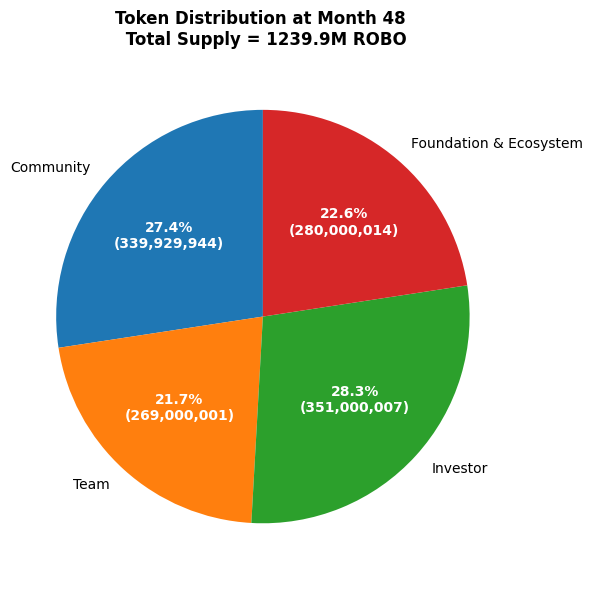

In [114]:
dff = df_baseline
mo = 48
community = dff['cumulative_emissions'].iloc[mo] + dff['airdrop_released'].iloc[mo] + dff['community_round_released'].iloc[mo]
team = dff['team_vested'].iloc[mo]
investor = dff['investor_vested'].iloc[mo]
foundation = dff['foundation_vested'].iloc[mo]
total= community + team + investor + foundation
# make a pie chart of this at month 48
# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
labels = ['Community', 'Team', 'Investor', 'Foundation & Ecosystem']
sizes = [community, team, investor, foundation]
# colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels,
                                   autopct=make_autopct(sizes), startangle=90)

# Customize the text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add title
emissions_total_48 = dff['cumulative_emissions'].iloc[mo]
print(emissions_total_48)

# ax.set_title(f'Token Distribution at Month {mo}: Total Supply = {total/1e6:.1f}M \n (Rewards + Staking Emissions + Airdrop + Community Round) = {emissions_total_48/1e6:.1f}M', fontweight='bold')
ax.set_title(f'Token Distribution at Month {mo} \n Total Supply = {total/1e6:.1f}M ROBO', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.tight_layout()
plt.savefig('supply_mo48.png')

In [115]:
# print teh total subnet emissions at month 48
dff['subnet_rewards'].cumsum().iloc[mo]/1e6


np.float64(197.32122895833334)

In [116]:
dff.columns

Index(['month', 'team_vested', 'investor_vested', 'foundation_vested',
       'airdrop_released', 'community_round_released',
       'airdrop_monthly_release', 'community_round_monthly_release',
       'base_emissions', 'net_base_emissions', 'additional_staking_emissions',
       'total_emissions', 'burn', 'circulating_supply', 'total_locked_supply',
       'staking_supply', 'ent_collateral', 'subnet_collateral',
       'staking_rewards', 'subnet_rewards', 'staking_apy',
       'target_staking_budget', 'actual_staking_budget',
       'subnet_guaranteed_emissions', 'ent_registration_fees',
       'subnet_registration_fees', 'subnet_maintenance_fees', 'total_fees',
       'active_ents', 'active_subnets', 'total_collateral', 'new_ents',
       'new_subnets', 'ent_departures', 'subnet_departures',
       'cumulative_emissions', 'cumulative_burn', 'cumulative_fixed_emissions',
       'cumulative_fees', 'ent_registration_fee', 'subnet_registration_fee',
       'ent_collateral_amount', 'subne

In [117]:
def plot_simulation(df):
    """
    Plot simulation results in two separate figures with logical grouping.
    
    Figure 1: Supply & Distribution Metrics (1x3)
    Figure 2: Protocol Dynamics & Economics (2x2)
    """
    
    # ========== FIGURE 1: Supply & Distribution Metrics ==========
    fig1, ax1 = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)
    
    # Plot 1: Supply Components
    axx = ax1[0]
    axx.plot(df['month'], df['team_vested']/1e6, label='Team')
    axx.plot(df['month'], df['investor_vested']/1e6, label='Investor')
    axx.plot(df['month'], df['foundation_vested']/1e6, label='Foundation & Ecosystem')
    axx.plot(df['month'], df['cumulative_emissions']/1e6, label='Community')
    axx.legend(fontsize=8)
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Supply Components', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 2: Circulating Supply
    axx = ax1[1]
    axx.plot(df['month'], df['circulating_supply']/1e6, linewidth=2, color='#2E86AB')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Circulating Supply', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 3: Locked/Circulating Percentage
    axx = ax1[2]
    axx.plot(df['month'], df['total_locked_supply']/df['circulating_supply']*100, linewidth=2, color='#A23B72')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('%', fontsize=10)
    axx.set_title('Locked/Circulating Pct.', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ========== FIGURE 2: Protocol Dynamics & Economics ==========
    fig2, ax2 = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
    
    # Plot 1: Monthly Inflation Rate
    axx = ax2[0, 0]
    axx.plot(df['month'], df['total_emissions']/df['circulating_supply'].shift(1)*100, linewidth=2, color='#06A77D')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('%', fontsize=10)
    axx.set_title('Monthly Inflation Rate', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 2: Burn/Emissions Percentage
    axx = ax2[0, 1]
    axx.plot(df['month'], df['cumulative_burn']/df['cumulative_emissions']*100, linewidth=2, color='#D62828')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('%', fontsize=10)
    axx.set_title('Burn/Emissions Pct.', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 3: Subnet Reward Emissions
    axx = ax2[1, 0]
    axx.plot(df['month'], df['base_emissions']/1e6, linewidth=2, color='#6A4C93')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Subnet Reward Emissions', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    # Plot 4: Cumulative Fees Collected
    axx = ax2[1, 1]
    axx.plot(df['month'], df['cumulative_fees']/1e6, linewidth=2, color='#F18F01')
    axx.axvline(x=48, color='black', linestyle='--', linewidth=0.5, alpha=0.7)
    axx.set_xlabel('Month', fontsize=10)
    axx.set_ylabel('M-ROBO', fontsize=10)
    axx.set_title('Cumulative Fees Collected', fontsize=11, fontweight='bold')
    axx.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [118]:
df_baseline['circulating_supply'].iloc[0:12]/1e6

0      42.699100
1      59.990755
2      77.270242
3      94.477158
4     111.608523
5     128.661170
6     139.802070
7     150.852432
8     161.810120
9     172.675049
10    183.446728
11    194.125051
Name: circulating_supply, dtype: float64

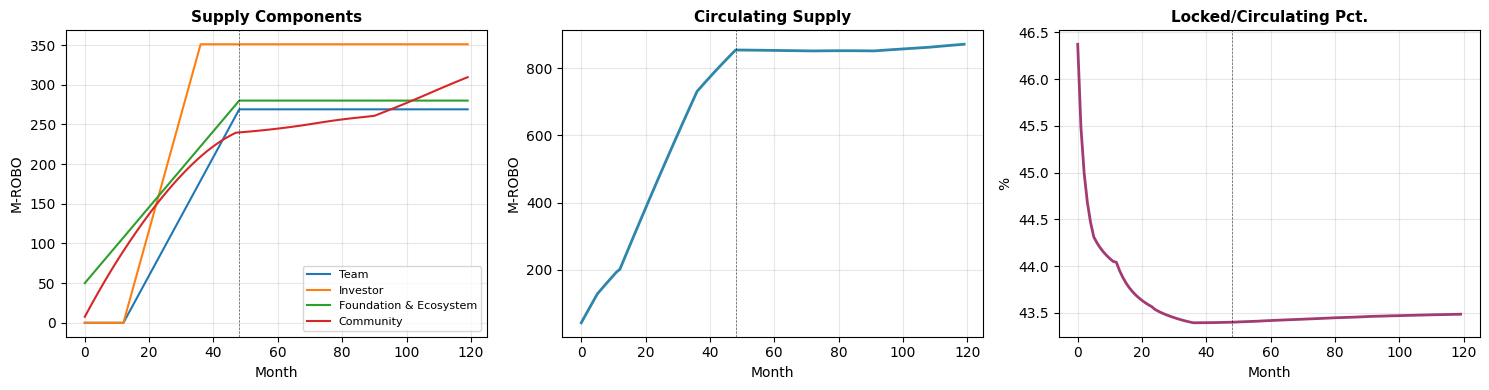

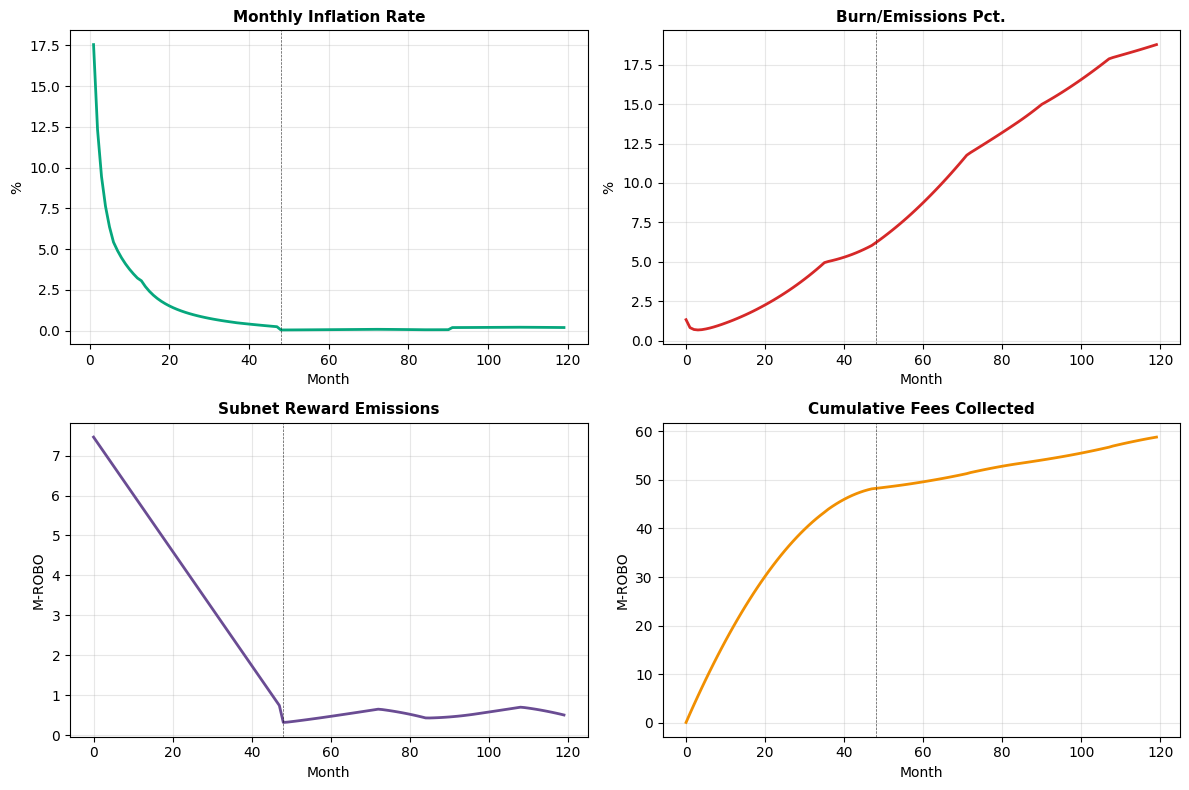

In [119]:
plot_simulation(df_baseline)

In [120]:
df_copy = robo_supply_model.print_yearly_emissions_percentage(df_baseline)

Emissions as % of Total Supply by Year:
Year 1: 84,186,488 ROBO / 1,084,186,488 ROBO = 7.76%
Year 2: 68,665,403 ROBO / 1,152,851,891 ROBO = 5.96%
Year 3: 53,000,565 ROBO / 1,205,852,456 ROBO = 4.40%
Year 4: 33,756,234 ROBO / 1,239,608,690 ROBO = 2.72%
Year 5: 4,639,625 ROBO / 1,244,248,315 ROBO = 0.37%
Year 6: 6,667,607 ROBO / 1,250,915,922 ROBO = 0.53%
Year 7: 6,813,168 ROBO / 1,257,729,090 ROBO = 0.54%
Year 8: 11,070,395 ROBO / 1,268,799,485 ROBO = 0.87%
Year 9: 20,269,721 ROBO / 1,289,069,206 ROBO = 1.57%
Year 10: 20,435,579 ROBO / 1,309,504,785 ROBO = 1.56%


In [121]:
# sanity check the community emissions
df_copy['emissions_noairdropcommunity'] = df_copy['total_emissions'] + df_copy['airdrop_monthly_release'] + df_copy['community_round_monthly_release']
yearly_emissions = df_copy.groupby('year')['emissions_noairdropcommunity'].sum()
yearly_emissions

year
1     1.841865e+08
2     6.866540e+07
3     5.300056e+07
4     3.375623e+07
5     4.639625e+06
6     6.667607e+06
7     6.813168e+06
8     1.107039e+07
9     2.026972e+07
10    2.043558e+07
Name: emissions_noairdropcommunity, dtype: float64

In [122]:
robo_supply_model.print_yearly_subnet_rewards(df_baseline)

Total Subnet Rewards by Year:
Year 1: 80,114,603 ROBO (80.11M ROBO)
Year 2: 59,538,201 ROBO (59.54M ROBO)
Year 3: 38,961,799 ROBO (38.96M ROBO)
Year 4: 18,385,397 ROBO (18.39M ROBO)
Year 5: 4,639,625 ROBO (4.64M ROBO)
Year 6: 6,667,607 ROBO (6.67M ROBO)
Year 7: 6,813,168 ROBO (6.81M ROBO)
Year 8: 5,540,191 ROBO (5.54M ROBO)
Year 9: 7,262,132 ROBO (7.26M ROBO)
Year 10: 7,403,688 ROBO (7.40M ROBO)

Total Subnet Rewards by Year (USD):
Year 1: $80,114,603 (avg price: $1.00)
Year 2: $59,538,201 (avg price: $1.00)
Year 3: $38,961,799 (avg price: $1.00)
Year 4: $18,385,397 (avg price: $1.00)
Year 5: $4,639,625 (avg price: $1.00)
Year 6: $6,667,607 (avg price: $1.00)
Year 7: $6,813,168 (avg price: $1.00)
Year 8: $5,540,191 (avg price: $1.00)
Year 9: $7,262,132 (avg price: $1.00)
Year 10: $7,403,688 (avg price: $1.00)

Average Per-Subnet Rewards by Year:
Year 1: 6,517,798 ROBO ($6,517,798) per subnet (avg 12.3 subnets)
Year 2: 3,443,173 ROBO ($3,443,173) per subnet (avg 17.3 subnets)
Year 3: 1,

year
1     8.011460e+07
2     5.953820e+07
3     3.896180e+07
4     1.838540e+07
5     4.639625e+06
6     6.667607e+06
7     6.813168e+06
8     5.540191e+06
9     7.262132e+06
10    7.403688e+06
Name: base_emissions, dtype: float64

In [123]:
robo_supply_model.print_yearly_subnet_rewards_table(df_baseline, units='ROBO')


Average Per-Subnet Rewards by Year (NET - After Maintenance Fees) - ROBO
Year   Avg Subnets   Per Subnet         Fees               Revenue Burn       Total Capture     
--------------------------------------------------------------------------------------------------------------
1      12.3              5,040,121 ROBO    18,400,337 ROBO       782,986 ROBO    19,183,323 ROBO
2      17.3              2,582,380 ROBO    15,027,150 ROBO     2,970,486 ROBO    17,997,636 ROBO
3      22.3              1,310,864 ROBO     9,883,750 ROBO     5,907,986 ROBO    15,791,736 ROBO
4      27.3                505,248 ROBO     4,815,166 ROBO     4,064,236 ROBO     8,879,402 ROBO
5      30.5                114,245 ROBO     1,310,873 ROBO     6,175,347 ROBO     7,486,220 ROBO
6      31.5                158,963 ROBO     1,815,702 ROBO     8,562,847 ROBO    10,378,549 ROBO
7      32.5                157,429 ROBO     1,928,209 ROBO     5,569,097 ROBO     7,497,306 ROBO
8      33.5                124,189 ROBO

In [124]:
robo_supply_model.print_yearly_subnet_rewards_table(df_baseline, units='USD')


Average Per-Subnet Rewards by Year (NET - After Maintenance Fees) - USD
Year   Avg Subnets   Per Subnet         Fees               Revenue Burn       Total Capture     
--------------------------------------------------------------------------------------------------------------
1      12.3               5,040,121 USD     18,400,337 USD        782,986 USD     19,183,323 USD
2      17.3               2,582,380 USD     15,027,150 USD      2,970,486 USD     17,997,636 USD
3      22.3               1,310,864 USD      9,883,750 USD      5,907,986 USD     15,791,736 USD
4      27.3                 505,248 USD      4,815,166 USD      4,064,236 USD      8,879,402 USD
5      30.5                 114,245 USD      1,310,873 USD      6,175,347 USD      7,486,220 USD
6      31.5                 158,963 USD      1,815,702 USD      8,562,847 USD     10,378,549 USD
7      32.5                 157,429 USD      1,928,209 USD      5,569,097 USD      7,497,306 USD
8      33.5                 124,189 USD 

In [125]:
df_baseline[['month','base_emissions']].to_csv('base_emissions.csv', index=False)

In [126]:
df_baseline[['month','total_emissions']].to_csv('total_emissions.csv', index=False)

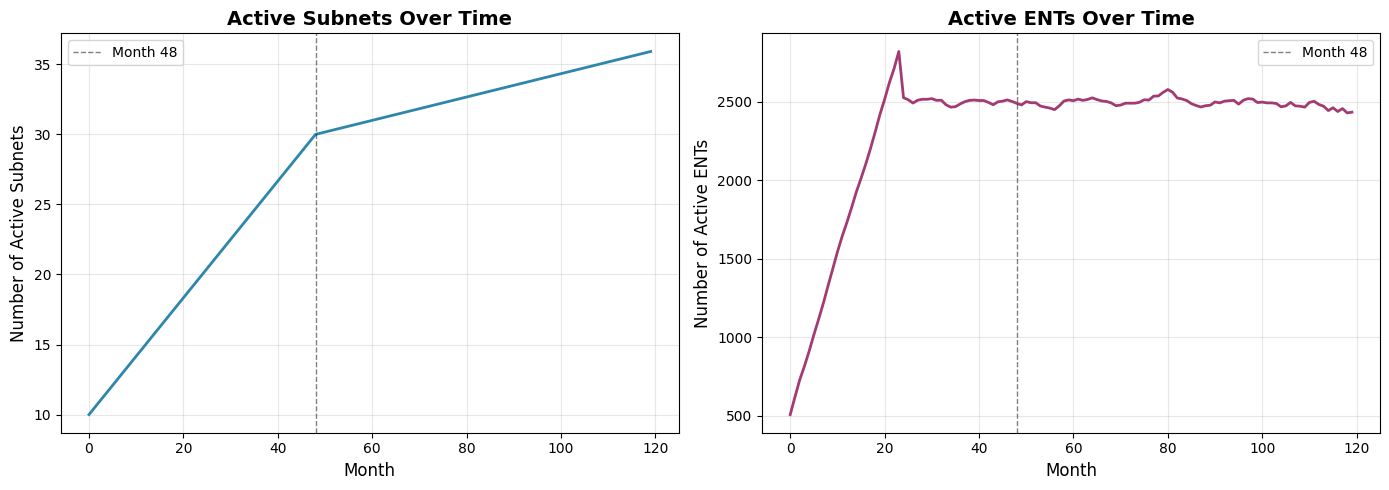

In [127]:
# Plot network growth: subnets and entities over time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Subplot 1: Number of subnets over time
ax1 = axes[0]
ax1.plot(df_baseline['month'], df_baseline['active_subnets'], linewidth=2, color='#2E86AB')
ax1.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Month 48')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Active Subnets', fontsize=12)
ax1.set_title('Active Subnets Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Subplot 2: Number of ENTs over time
ax2 = axes[1]
ax2.plot(df_baseline['month'], df_baseline['active_ents'], linewidth=2, color='#A23B72')
ax2.axvline(x=48, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Month 48')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Number of Active ENTs', fontsize=12)
ax2.set_title('Active ENTs Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()
